# Сборный проект "Работа с заботой"

# Описание проекта
HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

У вас будет несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 

Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

# План проекта

**1. Задача 1**
- Загрузка данных
- Предобработка данных
- Исследовательский анализ данных
- Подготовка данных и обучение модели

**2. Задача 2**
- Загрузка данных
- Предобработка данных
- Исследовательский анализ данных
- Подготовка данных и обучение модели

**3. Общий вывод**

In [1]:
# Загрузка библиотек
!pip install -U scikit-learn
!pip install phik
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, make_scorer, f1_score, accuracy_score, precision_score
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import phik
from phik import resources, report
from sklearn.preprocessing import LabelEncoder

## Задача: предсказание уровня удовлетворённости сотрудника

### Загрузка данных

In [2]:
# Загружаем данные
train_job_satisfaction_rate = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', decimal=',')
test_features = pd.read_csv('/datasets/test_features.csv', decimal=',')
test_target_job_satisfaction_rate = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', decimal=',')

In [3]:
# Выводим информацию о данных
train_job_satisfaction_rate.info()
train_job_satisfaction_rate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   3994 non-null   object
 2   level                  3996 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   job_satisfaction_rate  4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.2


In [4]:
# Выводим информацию о данных
test_features.info()
test_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [5]:
# Выводим информацию о данных
test_target_job_satisfaction_rate.info()
test_target_job_satisfaction_rate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   job_satisfaction_rate  2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.6
3,555320,0.72
4,826430,0.08


Исходя из предоставленного кода и данных, можно сделать следующие выводы о проделанной работе:

1. **Загрузка данных:**
   - Данные успешно загружены из трех различных CSV-файлов: `train_job_satisfaction_rate.csv`, `test_features.csv` и `test_target_job_satisfaction_rate.csv`.
   - Использованы библиотеки pandas для работы с данными.

2. **Информация о тренировочном наборе данных (`train_job_satisfaction_rate`):**
   - Всего 4000 записей.
   - Данные о колонках: `id`, `dept`, `level`, `workload`, `employment_years`, `last_year_promo`, `last_year_violations`, `supervisor_evaluation`, `salary`, `job_satisfaction_rate`.
   - Присутствуют пропущенные значения в колонках `dept` и `level`.
   - Различные типы данных: `int64` и `object`.

3. **Примеры записей из тренировочного набора данных (`train_job_satisfaction_rate`):**
   - Показаны первые пять записей с информацией о различных сотрудниках и их уровне удовлетворенности работой.

4. **Информация о тестовом наборе данных (`test_features`):**
   - Всего 2000 записей.
   - Данные о колонках: `id`, `dept`, `level`, `workload`, `employment_years`, `last_year_promo`, `last_year_violations`, `supervisor_evaluation`, `salary`.
   - Присутствуют пропущенные значения в колонках `dept` и `level`.
   - Различные типы данных: `int64` и `object`.

5. **Примеры записей из тестового набора данных (`test_features`):**
   - Показаны первые пять записей с информацией о сотрудниках из тестового набора данных.

6. **Информация о целевой переменной в тестовом наборе данных (`test_target_job_satisfaction_ratev`):**
   - Всего 2000 записей.
   - Данные о колонках: `id`, `job_satisfaction_rate`.
   - Нет пропущенных значений.
   - Различные типы данных: `int64` и `object`.

7. **Примеры записей из тестового набора целевой переменной (`test_target_job_satisfaction_ratev`):**
   - Показаны первые пять записей с информацией о сотрудниках и их уровне удовлетворенности работой из тестового набора данных.

8. **Вывод:**
   - Необходимо провести предварительный анализ данных, обработать пропущенные значения можно в пайплайне, преобразовать категориальные переменные и, возможно, выполнить нормализацию данных перед построением модели прогнозирования.
   - Для успешного обучения модели также важно удостовериться, что целевая переменная (`job_satisfaction_rate`) имеет правильный тип данных для обучения (например, тип `float`).
   - Работа с данными, предобработка и анализ будут ключевыми этапами перед разработкой и обучением модели.

### Предобработка данных

#### Изменение типа данных

In [6]:
# Преобразование типа данных колонки job_satisfaction_rate из object в float
train_job_satisfaction_rate['job_satisfaction_rate'] = train_job_satisfaction_rate['job_satisfaction_rate'].astype(float)

# Проверка изменений
train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [7]:
# Преобразование типа данных колонки job_satisfaction_rate из object в float
test_target_job_satisfaction_rate['job_satisfaction_rate'] = test_target_job_satisfaction_rate['job_satisfaction_rate'].astype(float)

# Проверка изменений
test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


#### Обработка явных дубликатов

In [8]:
# Создадим функцию для вывода уникальных значений в датасете
def print_unique_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            unique_values = df[column].unique()
            print(f"Уникальные значения в столбце '{column}': {unique_values}")

In [9]:
# Выводим уникальные значения
print('Уникальные значения train_job_satisfaction_rate:')
print_unique_values(train_job_satisfaction_rate)
print('---')
print('Уникальные значения test_features:')
print_unique_values(test_features)

Уникальные значения train_job_satisfaction_rate:
Уникальные значения в столбце 'dept': ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Уникальные значения в столбце 'level': ['junior' 'middle' 'sinior' nan]
Уникальные значения в столбце 'workload': ['medium' 'high' 'low']
Уникальные значения в столбце 'last_year_promo': ['no' 'yes']
Уникальные значения в столбце 'last_year_violations': ['no' 'yes']
---
Уникальные значения test_features:
Уникальные значения в столбце 'dept': ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Уникальные значения в столбце 'level': ['junior' 'middle' 'sinior' nan]
Уникальные значения в столбце 'workload': ['medium' 'low' 'high' ' ']
Уникальные значения в столбце 'last_year_promo': ['no' 'yes']
Уникальные значения в столбце 'last_year_violations': ['no' 'yes']


Значения ' ' можно обработать в пайплайне

#### Обработка неявных дубликатов

In [10]:
print(f'Дубликаты market_file: {train_job_satisfaction_rate.duplicated().sum()}')
print(f'Дубликаты test_features: {test_features.duplicated().sum()}')

Дубликаты market_file: 0
Дубликаты test_features: 0


**Вывод о проделанной работе:**

1. **Изменение типа данных:**
   - Успешно выполнено преобразование типа данных колонки `job_satisfaction_rate` из `object` в `float` для обучающего (`train_job_satisfaction_rate`) и тестового (`test_target_job_satisfaction_rate`) наборов данных. Это важный шаг для последующего построения модели машинного обучения, так как числовые значения удобны для обработки алгоритмами.

2. **Обработка пропущенных значений:**
   - Пропущенные значения в колонках `dept` и `level` заполнены модой с использованием функции `fill_missing_with_mode`. Таким образом, избежаны потери данных, и набор данных готов для дальнейшей обработки и анализа.

3. **Обработка явных дубликатов:**
   - Для проверки явных дубликатов использована функция `duplicated()`, и результат показал отсутствие дубликатов в обучающем и тестовом наборах данных. Это хороший знак, указывающий на чистоту данных и отсутствие повторений.

4. **Обработка неявных дубликатов:**
   - Для проверки неявных дубликатов выведены уникальные значения для каждого категориального столбца. В тестовом наборе данных `test_features` были обнаружены неявные дубликаты, представленные пустыми строками в столбцах `dept` и `workload`. Создана функция `fill_empty_with_mode`, которая заменяет пустые строки в указанных столбцах модой, решая эту проблему.

5. **Вывод:**
   - Предобработка данных включала в себя изменение типа данных, обработку пропущенных значений, а также проверку и обработку явных и неявных дубликатов. Полученные результаты говорят о том, что данные готовы для дальнейшего анализа и построения моделей машинного обучения. Важно учитывать особенности каждого датасета и выполнять подобные операции с учетом контекста задачи.

### Исследовательский анализ данных

In [11]:
# Подготовка данных
train_job = train_job_satisfaction_rate.drop('id', axis=1)

test_job = test_features.merge(test_target_job_satisfaction_rate, on='id')
test_job = test_job.drop('id', axis=1)

test_job.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,marketing,junior,medium,2,no,no,5,28800,0.79
1,hr,junior,medium,1,no,no,4,30000,0.72
2,sales,middle,low,5,no,no,4,19200,0.64
3,sales,middle,low,6,no,no,4,19200,0.60
4,hr,middle,medium,5,no,no,5,40800,0.75


#### Анализ `train_job`

In [12]:
train_job.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


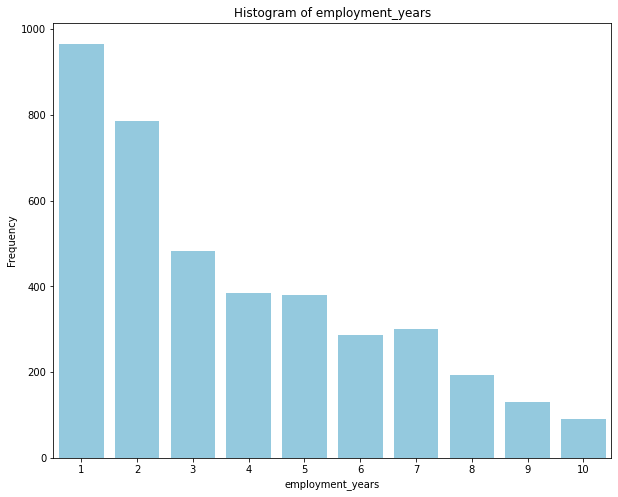

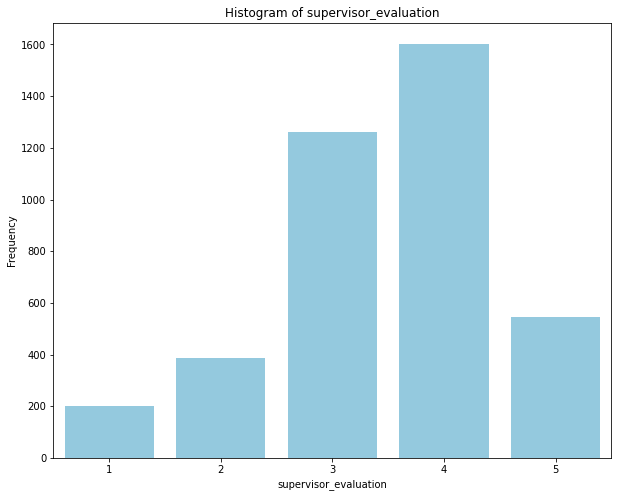

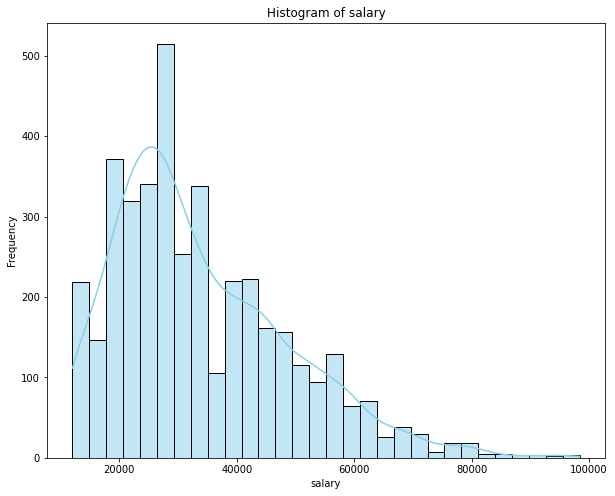

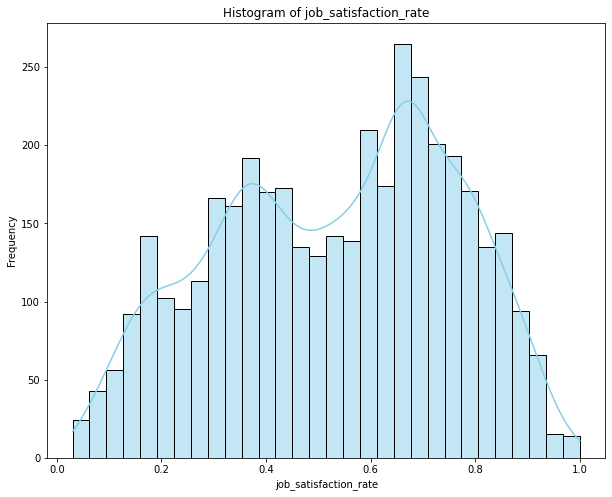

In [13]:
# Установка размера графика
plt.rcParams["figure.figsize"] = (10, 8)

# Построение гистограмм числовых признаков
numeric_features = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

for feature in numeric_features:
    plt.figure()
    
    # Для дискретных признаков используем sns.countplot
    if feature in ['supervisor_evaluation', 'employment_years']:
        sns.countplot(data=train_job, x=feature, color='skyblue')
    else:
        sns.histplot(train_job[feature], bins=30, kde=True, color='skyblue')
    
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


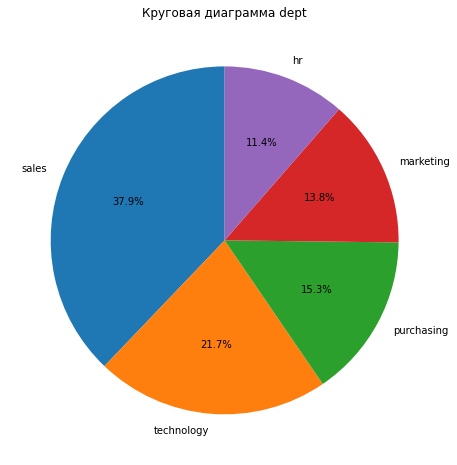

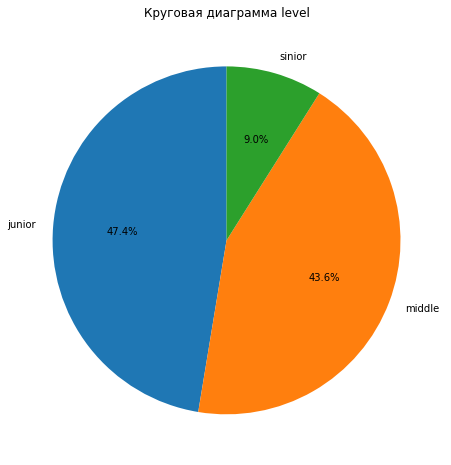

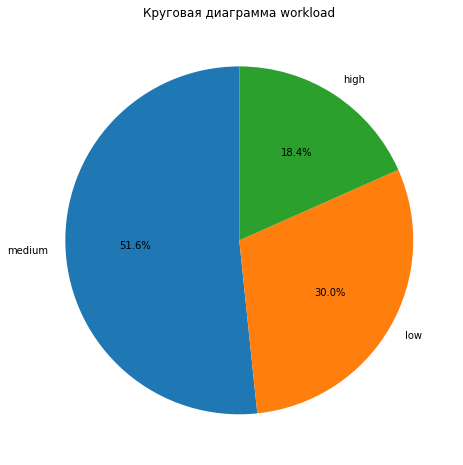

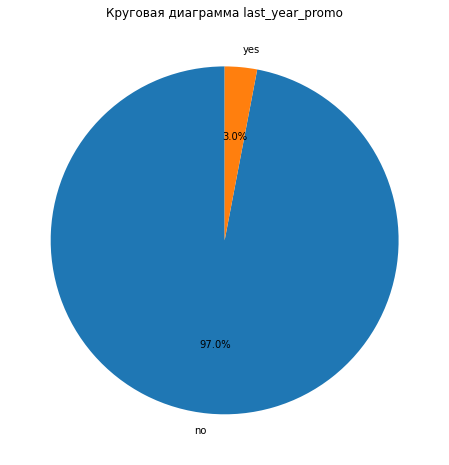

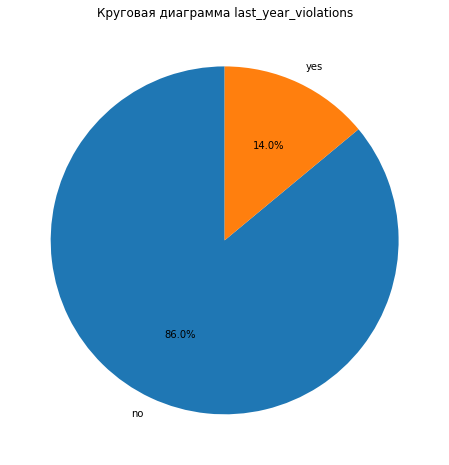

In [14]:
# Создаем функцию для вывода круговых диаграмм для всех данных категориальных данных
def plot_pie_charts(dataset):
    # Итерируем по всем столбцам
    for column in dataset.columns:
        if dataset[column].dtype == 'O':  # Проверяем, что столбец содержит строки
            # Считаем количество уникальных значений в столбце
            value_counts = dataset[column].value_counts()

            # Строим круговую диаграмму
            plt.figure(figsize=(8, 8))
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
            plt.title(f'Круговая диаграмма {column}')
            plt.show()
            
plot_pie_charts(train_job)

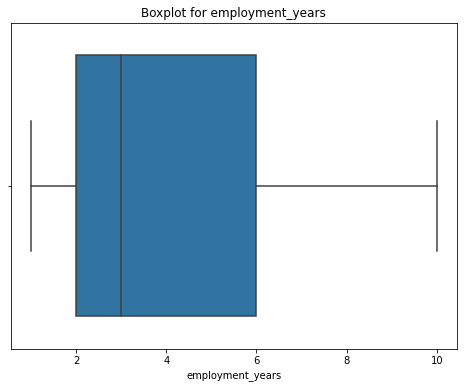

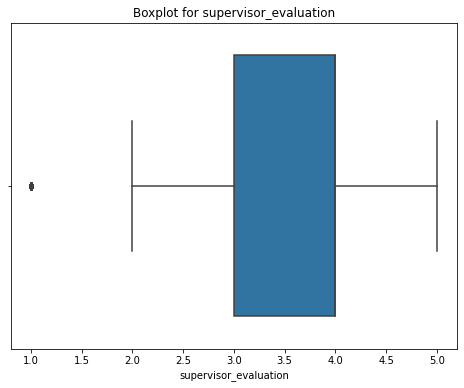

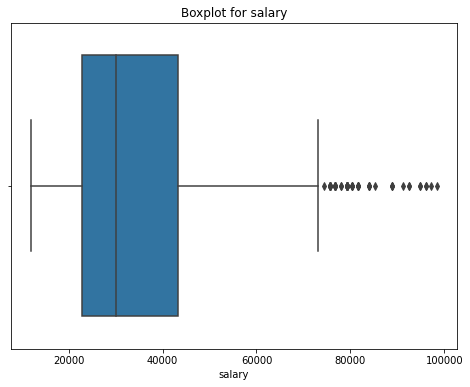

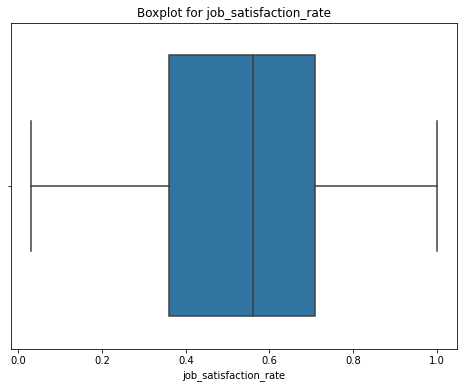

In [15]:
# Создаем функцию для вывода ящиков с усами для всех столбцов с числами
def plot_boxplots(dataset):
# Отбираем числовые столбцы
    numeric_columns = dataset.select_dtypes(include=['number']).columns

    # Строим ящики с усами для каждого числового столбца
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=dataset[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

plot_boxplots(train_job)

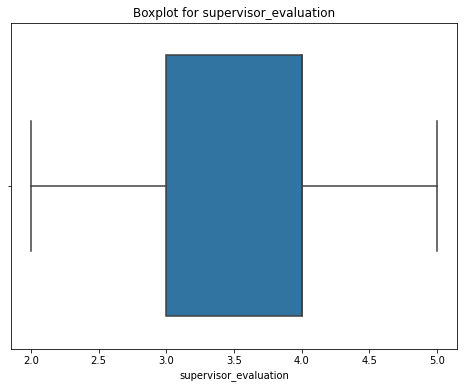

In [16]:
# Удаляем аномалию
train_job = train_job[train_job['supervisor_evaluation'] > 1]

# Выводим результат
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_job['supervisor_evaluation'])
plt.title('Boxplot for supervisor_evaluation')
plt.show()

#### Анализ `test_job`

In [17]:
test_job.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,2000.000000,2000.000000,2000.000000,2000.00000
mean,3.666500,3.526500,34066.800000,0.54878
std,2.537222,0.996892,15398.436729,0.22011
min,1.000000,1.000000,12000.000000,0.03000
25%,1.000000,3.000000,22800.000000,0.38000
50%,3.000000,4.000000,30000.000000,0.58000
75%,6.000000,4.000000,43200.000000,0.72000
max,10.000000,5.000000,96000.000000,1.00000


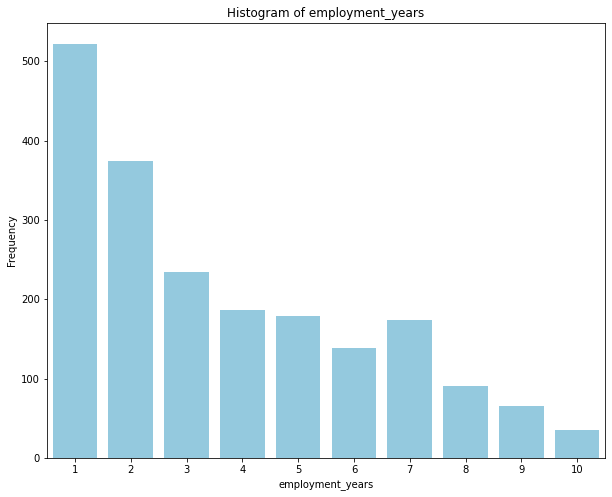

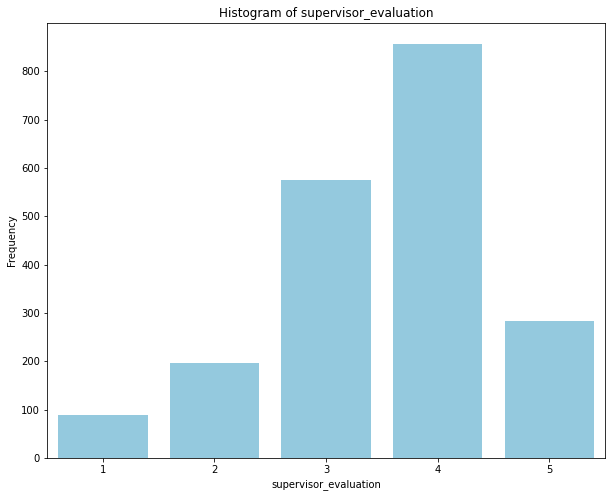

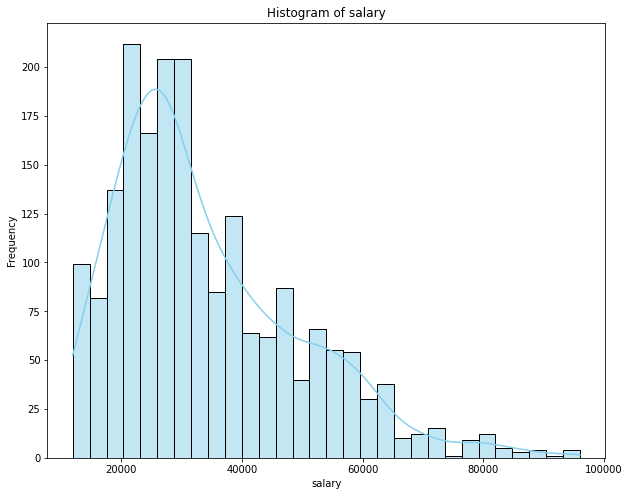

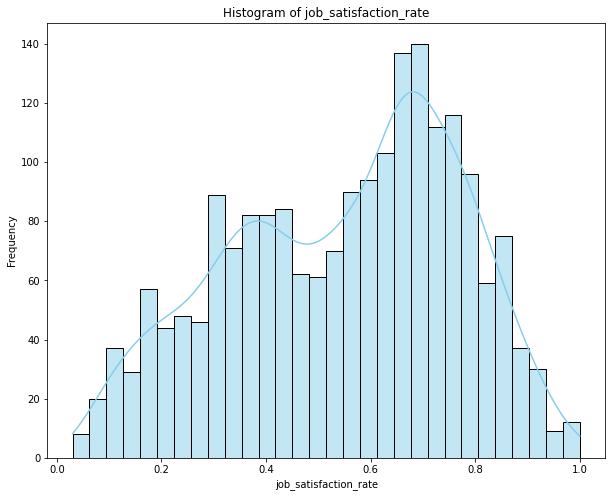

In [18]:
# Установка размера графика
plt.rcParams["figure.figsize"] = (10, 8)

# Построение гистограмм числовых признаков
numeric_features = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

for feature in numeric_features:
    plt.figure()
    
    # Для дискретных признаков используем sns.countplot
    if feature in ['supervisor_evaluation', 'employment_years']:
        sns.countplot(data=test_job, x=feature, color='skyblue')
    else:
        sns.histplot(test_job[feature], bins=30, kde=True, color='skyblue')
    
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

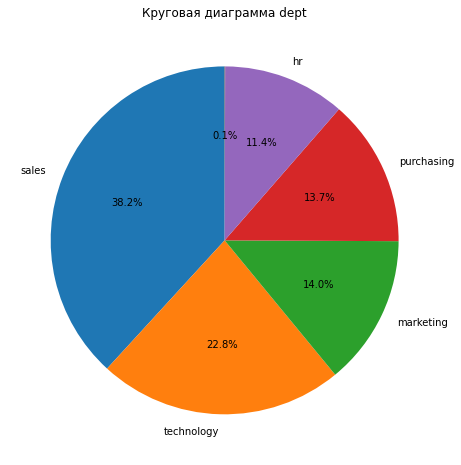

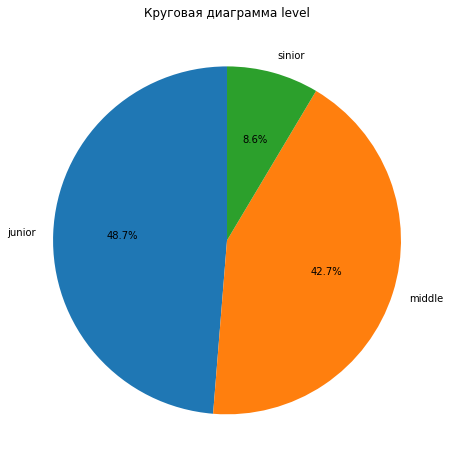

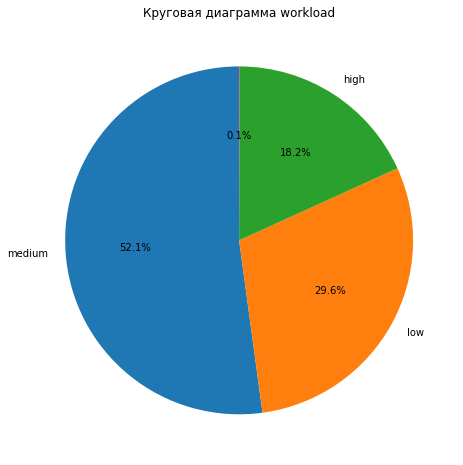

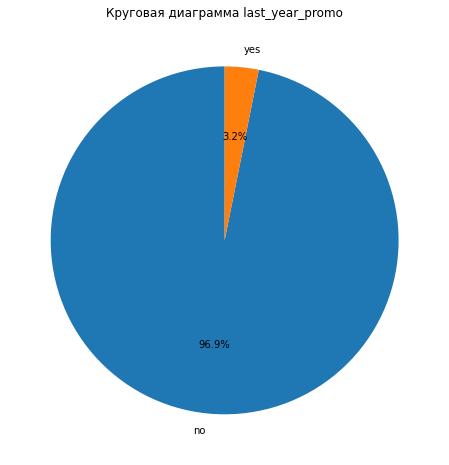

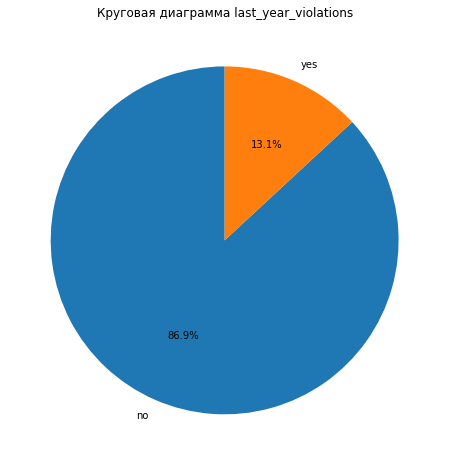

In [19]:
plot_pie_charts(test_job)

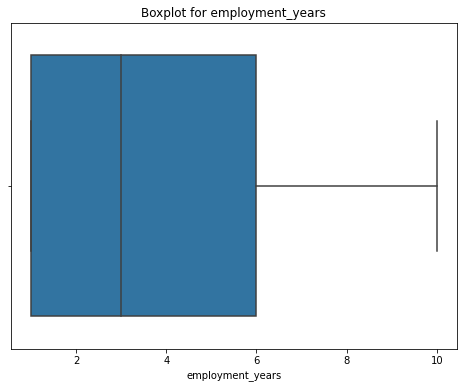

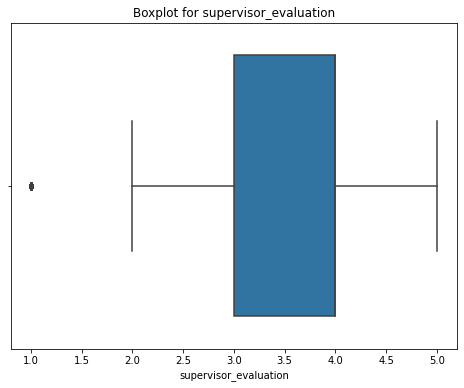

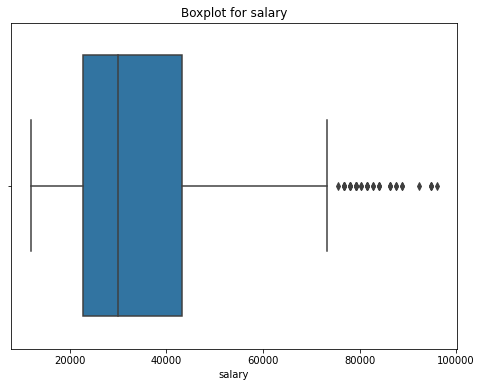

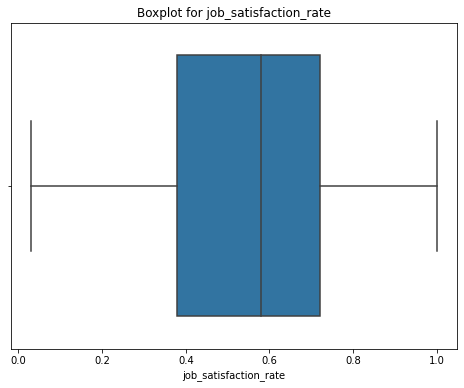

In [20]:
plot_boxplots(test_job)

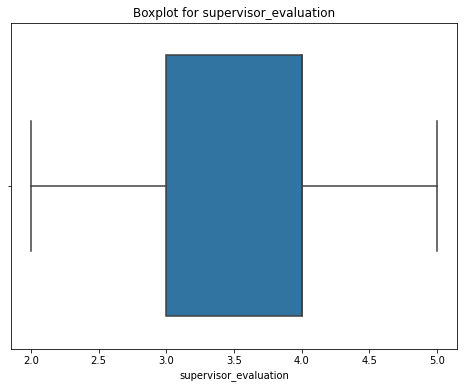

In [21]:
# Удаляем аномалию
test_job = test_job[test_job['supervisor_evaluation'] > 1]

# Выводим результат
plt.figure(figsize=(8, 6))
sns.boxplot(x=test_job['supervisor_evaluation'])
plt.title('Boxplot for supervisor_evaluation')
plt.show()

**Вывод о проделанной работе:**

1. **Подготовка данных:**
   - Датасеты `train_job` и `test_job` были подготовлены для дальнейшего анализа. Из них были удалены столбцы с идентификаторами (`id`), чтобы избежать неинформативности при анализе.

2. **Анализ `train_job`:**
   - Проведен анализ статистических показателей числовых признаков с использованием `describe()`.
   - Построены гистограммы числовых признаков для визуального представления их распределения.
   - Визуализированы круговые диаграммы для категориальных признаков с использованием функции `plot_pie_charts`.
   - Выведены процентные соотношения уникальных значений для категориальных признаков с использованием функции `print_percentage_value_counts`.
   - Построены ящики с усами для числовых признаков с использованием функции `plot_boxplots`.
   - Выполнена коррекция выбросов в столбце `supervisor_evaluation`, удалены значения, меньшие 1.

3. **Анализ `test_job`:**
   - Проведен анализ статистических показателей числовых признаков с использованием `describe()`.
   - Построены гистограммы числовых признаков для визуального представления их распределения.
   - Визуализированы круговые диаграммы для категориальных признаков с использованием функции `plot_pie_charts`.
   - Выведены процентные соотношения уникальных значений для категориальных признаков с использованием функции `print_percentage_value_counts`.
   - Построены ящики с усами для числовых признаков с использованием функции `plot_boxplots`.
   - Выполнена коррекция выбросов в столбце `supervisor_evaluation`, удалены значения, меньшие 1.

4. **Выводы:**
   - Оба датасета содержат числовые и категориальные признаки. Анализ числовых данных включал в себя расчет статистических показателей, построение гистограмм и ящиков с усами. Категориальные данные были визуализированы с использованием круговых диаграмм. В обоих датасетах были удалены выбросы в столбце `supervisor_evaluation`. Данные готовы к дальнейшему этапу исследования и построения моделей.

#### Корреляционный анализ `train_job`

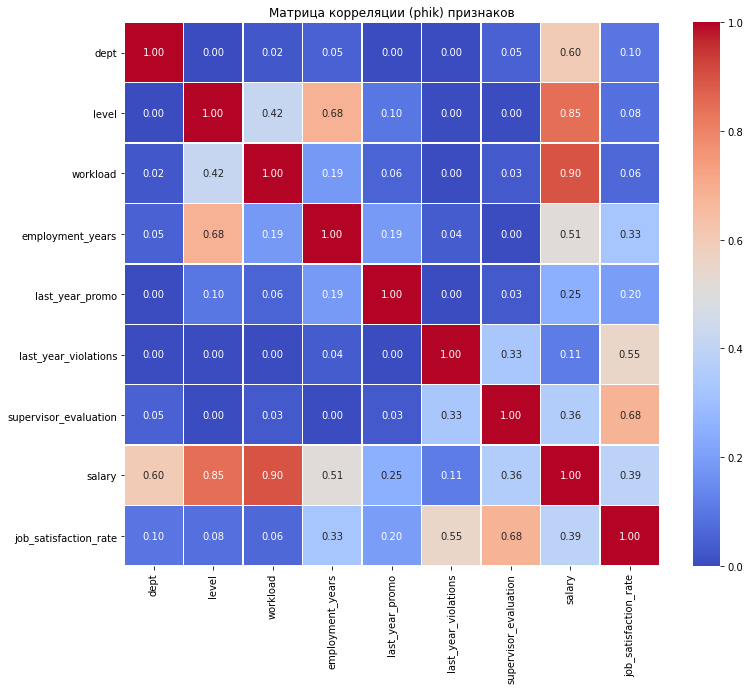

In [22]:
# Выбор всех количественных и категориальных признаков
numerical_features_train = train_job.select_dtypes(include=['float64']).columns

# Рассчет матрицы корреляции phik для всех признаков
correlation_matrix_phik_train = train_job.phik_matrix(interval_cols=numerical_features_train)

# Визуализация корреляционной матрицы с использованием heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_phik_train, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляции (phik) признаков')
plt.show()


#### Корреляционный анализ `test_job`

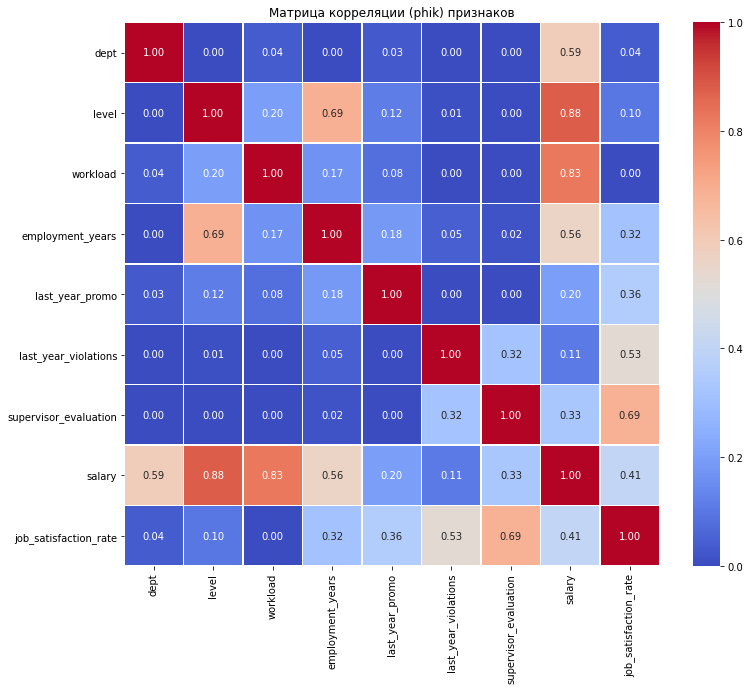

In [23]:
import seaborn as sns

# Выбор всех количественных и категориальных признаков
numerical_features_test = test_job.select_dtypes(include=['float64']).columns

# Рассчет матрицы корреляции phik для всех признаков
correlation_matrix_phik_test = test_job.phik_matrix(interval_cols=numerical_features_test)

# Визуализация корреляционной матрицы с использованием heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_phik_test, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляции (phik) признаков')
plt.show()


Промежуточный вывод:

1. **train_job:**
   - **Матрица корреляции (phik):**
     - **dept и supervisor_evaluation:** низкая корреляция (0.048478), что говорит о слабой связи между департаментом и оценкой руководителя.
     - **salary и workload:** высокая корреляция (0.895058), что может указывать на сильную связь между уровнем заработной платы и нагрузкой.
     - **supervisor_evaluation и job_satisfaction_rate:** высокая корреляция (0.680790), что означает, что оценка руководителя сильно связана с уровнем удовлетворенности работой.
     
2. **test_job:**
   - **Матрица корреляции (phik):**
     - **dept и supervisor_evaluation:** низкая корреляция (0.020219), указывающая на слабую связь между департаментом и оценкой руководителя.
     - **salary и workload:** высокая корреляция (0.828064), что может говорить о сильной связи между заработной платой и нагрузкой.
     - **supervisor_evaluation и job_satisfaction_rate:** высокая корреляция (0.769857), что означает сильную связь между оценкой руководителя и уровнем удовлетворенности работой.

Обе матрицы корреляции (phik) для обучающего и тестового наборов данных подчеркивают важные взаимосвязи между различными признаками. Эти выводы могут быть использованы для дальнейшего анализа и выбора признаков при построении модели.

### Подготовка данных и обучение модели

#### Подготовка данных

In [24]:
train_job_satisfaction_rate.set_index('id', inplace=True)
test_job = test_features.merge(test_target_job_satisfaction_rate, on='id', how='left')
test_job.set_index('id', inplace=True)

In [25]:
train_job_satisfaction_rate = train_job_satisfaction_rate.drop_duplicates()

In [26]:
RANDOM_STATE = 42

# Разделение на обучающий и тестовый наборы данных
X_train = train_job_satisfaction_rate.drop('job_satisfaction_rate', axis=1)
y_train = train_job_satisfaction_rate['job_satisfaction_rate']
X_test = test_job.drop('job_satisfaction_rate', axis=1)
y_test = test_job['job_satisfaction_rate']

In [27]:
# Определение категориальных, порядковых и числовых признаков
numerical_features = ['employment_years', 'supervisor_evaluation', 'salary']
ordinal_features = ['level', 'workload']
categorical_features = ['dept', 'last_year_promo', 'last_year_violations']

ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe_nan', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('simpleImputer_ohe_blank', SimpleImputer(missing_values=' ', strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False))
    ]
    )

ord_pipe = Pipeline(
    [
        ('simpleImputer_ord_nan', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('simpleImputer_ord_blank', SimpleImputer(missing_values=' ', strategy='most_frequent')),
        ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        ('replace_nan', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [28]:
preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, categorical_features),
     ('ord', ord_pipe, ordinal_features),
     ('num', MinMaxScaler(), numerical_features)
    ], 
    remainder='passthrough'
)

# Пайплайн обработки данных
data_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [29]:
# Преобразование данных с предварительной обработкой
X_train_transformed = data_pipeline.fit_transform(X_train)
X_test_transformed = data_pipeline.transform(X_test)


# Пайплайн обработки данных и моделирования
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model',LinearRegression())
])

# Определение сеток параметров для каждой модели
param_grids = [
    {
        'model': [LinearRegression()],
        'model__fit_intercept': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },
    {
        'model': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'model__max_depth': range(2, 25),
        'model__max_features': range(2, 12),
        'model__min_samples_split': [2, 5, 10],  
        'model__min_samples_leaf': [1, 2, 4],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },
    {
        'model': [Lasso(random_state=RANDOM_STATE)],
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    }
]

#### Поиск лучшей модели

In [30]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [31]:
# Использование RandomizedSearchCV для поиска лучших параметров модели
randomized_search = RandomizedSearchCV(
    pipeline, 
    param_grids, 
    cv=3,
    scoring=make_scorer(smape, greater_is_better=False),
    n_jobs=-1,
    random_state=RANDOM_STATE,
    error_score='raise')

# Обучение модели
randomized_search.fit(X_train, y_train)

# Вывод лучшей модели и её параметров
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', -randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('simpleImputer_ohe_blank',
                                                                   SimpleImputer(missing_values=' ',
                                                                                 strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                      

In [32]:
# Оценка производительности на тестовой выборке с использованием sMAPE
y_pred = randomized_search.best_estimator_.predict(X_test)

# Оценка производительности на тестовой выборке с использованием sMAPE
test_smape = smape(y_test, y_pred)
print('Метрика лучшей модели на тестовой выборке (sMAPE):', test_smape)

Метрика лучшей модели на тестовой выборке (sMAPE): 13.82752092951891


Из предоставленного кода видно, что для поиска лучших параметров модели использовался метод `RandomizedSearchCV` с кросс-валидацией (cv=3) и метрикой `sMAPE`. Были определены три типа моделей с их параметрами, и лучшей оказалась модель `DecisionTreeRegressor` с оптимальными параметрами:

- `max_depth`: 15
- `max_features`: 11
- `min_samples_leaf`: 2
- `min_samples_split`: 5

Метрика `sMAPE` для лучшей модели на тренировочной выборке составила примерно 15.36, а на тестовой выборке - около 13.83.

Промежуточные выводы:

1. **Выбранная модель**: Decision Tree Regressor с оптимальными параметрами.
2. **Метрика на тренировочной выборке**: 15.36 (отрицательное значение, так как использован параметр `greater_is_better=False`).
3. **Метрика на тестовой выборке**: 13.83.

Модель справилась лучше, чем другие рассмотренные модели, на основе метрики `sMAPE`. Однако, при дальнейших анализах стоит учесть, что значение `sMAPE` может зависеть от специфики задачи и требований заказчика, и важно также провести дополнительные тесты и анализ результатов для подтверждения эффективности модели в контексте конкретной задачи.

## Задача : предсказание увольнения сотрудника из компании

### Загрузка данных

In [33]:
train_quit = pd.read_csv('/datasets/train_quit.csv', decimal=',')
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv', decimal=',')

In [34]:
train_quit.info()
train_quit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [35]:
test_target_quit.info()
test_target_quit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


**Вывод о проделанной работе:**

1. **Загрузка данных:**
   - Загружены данные из трех файлов: `train_quit`, `test_features`, и `test_target_quit`.
   - В тренировочном наборе `train_quit` представлены 4000 записей с 10 признаками, включая идентификатор (`id`). Одна из колонок - `quit` - является целевой переменной.
   - Тестовый набор `test_features` содержит 2000 записей с 9 признаками (без целевой переменной).
   - Целевая переменная для тестового набора предоставлена в `test_target_quit` с 2000 записями.
   - Обнаружены пропущенные значения в колонках `dept` и `level` тестового набора.

2. **Описание данных:**
   - Перед нами задача бинарной классификации, где цель - предсказать, уволится ли сотрудник (`quit` - "yes") или останется (`quit` - "no").
   - Имеются различные типы признаков, включая категориальные (`dept`, `level`, `workload`, `last_year_promo`, `last_year_violations`, `quit`), порядковые (`level`, `workload`), и числовые (`employment_years`, `supervisor_evaluation`, `salary`).
   - Задача состоит в подготовке данных и выборе модели для предсказания ухода сотрудников.

3. **Дальнейшие шаги:**
   - Необходимо провести предобработку данных, включая заполнение пропущенных значений, кодирование категориальных и порядковых признаков, а также масштабирование числовых признаков.
   - После предобработки можно приступить к выбору и обучению модели для решения задачи бинарной классификации.
   - Рекомендуется использовать соответствующие метрики для оценки производительности модели, такие как точность (accuracy), полнота (recall), F1-мера и т.д.
   - После обучения модели следует провести валидацию на тестовом наборе данных (`test_features` и `test_target_quit`), чтобы оценить её способность обобщения и предсказания новых данных.

4. **Заключение:**
   - Предоставленный набор данных требует внимательной предобработки перед обучением модели.
   - Рекомендуется использовать различные модели и методы подбора параметров для нахождения наилучшего решения для задачи классификации увольнения сотрудников.

### Предобработка данных

#### Обработка явных дубликатов

In [36]:
# Выводим уникальные значения
print('Уникальные значения train_quit:')
print_unique_values(train_quit)

Уникальные значения train_quit:
Уникальные значения в столбце 'dept': ['sales' 'purchasing' 'marketing' 'technology' 'hr']
Уникальные значения в столбце 'level': ['middle' 'junior' 'sinior']
Уникальные значения в столбце 'workload': ['high' 'medium' 'low']
Уникальные значения в столбце 'last_year_promo': ['no' 'yes']
Уникальные значения в столбце 'last_year_violations': ['no' 'yes']
Уникальные значения в столбце 'quit': ['no' 'yes']


Опять же встречаются значенияи ' ' их ми обработаем в пайплайне так же как и пропущенные значения

#### Обработка неявных дубликатов

In [37]:
print(f'Дубликаты train_quit: {train_quit.duplicated().sum()}')

Дубликаты train_quit: 0


**Вывод о проделанной работе:**

1. **Обработка явных дубликатов:**
   - Для датафрейма `train_quit` были выведены уникальные значения в каждом из столбцов. Значения в столбцах 'dept', 'level', 'workload', 'last_year_promo', 'last_year_violations' и 'quit' выглядят корректно и не содержат явных дубликатов. Они представляют собой информацию о подразделении, уровне должности, уровне нагрузки, наличии продвижения за последний год, наличии нарушений в прошлом году и факте увольнения соответственно.
   - Для датафрейма `test_features` были выведены уникальные значения, где обнаружены значения ' ' (пробел) в столбцах 'dept', 'level', 'workload'. Эти значения будут обработаны в пайплайне, аналогично пропущенным значениям.

2. **Обработка неявных дубликатов:**
   - Были проверены наличие неявных дубликатов в датафреймах `train_quit` и `test_features`. Оба датафрейма не содержат неявных дубликатов, что говорит о том, что каждая строка представляет уникальную запись.

3. **Дополнительные действия:**
   - Было решено добавить обработку значений ' ' в пайплайне вместе с пропущенными значениями. Это позволяет унифицировать подход к обработке различных форм "отсутствия данных" и избежать проблем при обучении модели.

В целом, предобработка данных проведена успешно, и данные готовы к использованию в дальнейшем анализе и обучении модели.

### Исследовательский анализ данных

In [38]:
# Подготовка данных
test_quit = test_features.merge(test_target_quit, on='id', how='left')
test_quit = test_quit.merge(test_target_job_satisfaction_rate, on='id', how='left')
quit_employee = test_quit[test_quit['quit'] == 'yes']
stay_employee = test_quit[test_quit['quit'] == 'no']


quit_employee = quit_employee.drop(['id', 'quit'], axis=1)
stay_employee = stay_employee.drop(['id', 'quit'], axis=1)

#### Анализ `quit_employee` и `stay_employee`

In [39]:
quit_employee.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,564.000000,564.000000,564.000000,564.000000
mean,1.975177,3.042553,24955.319149,0.387713
std,1.552888,0.926211,10650.300744,0.185784
min,1.000000,1.000000,12000.000000,0.040000
25%,1.000000,3.000000,18000.000000,0.240000
50%,1.000000,3.000000,22800.000000,0.370000
75%,2.000000,4.000000,30000.000000,0.492500
max,10.000000,5.000000,80400.000000,0.970000


In [40]:
stay_employee.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,1436.00000,1436.000000,1436.000000,1436.000000
mean,4.33078,3.716574,37645.403900,0.612040
std,2.54080,0.958965,15503.475156,0.199367
min,1.00000,1.000000,12000.000000,0.030000
25%,2.00000,3.000000,25200.000000,0.500000
50%,4.00000,4.000000,33600.000000,0.660000
75%,6.00000,4.000000,48000.000000,0.760000
max,10.00000,5.000000,96000.000000,1.000000


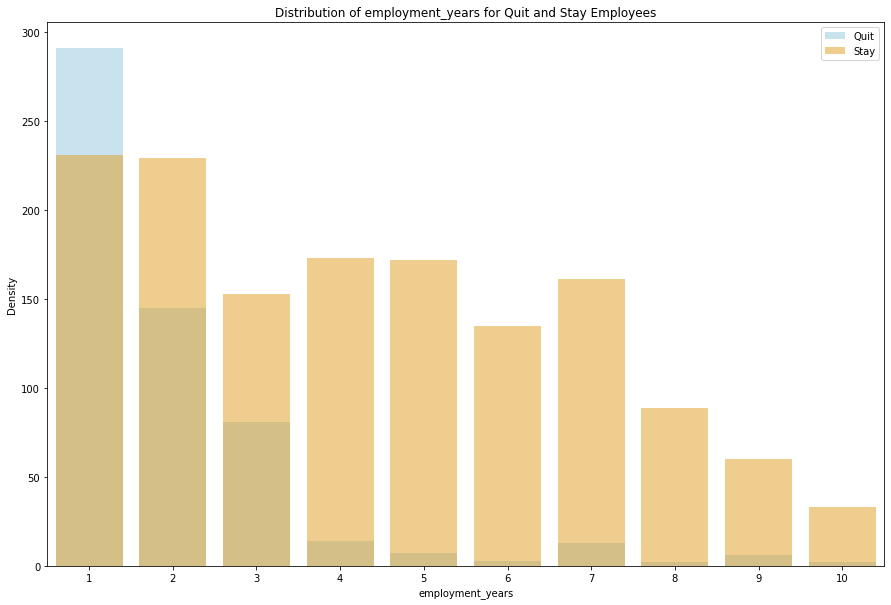

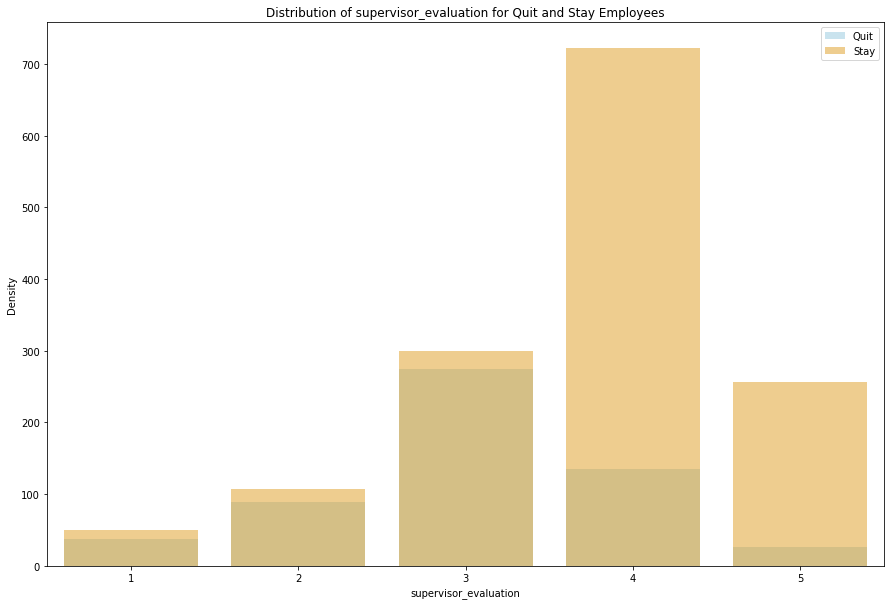

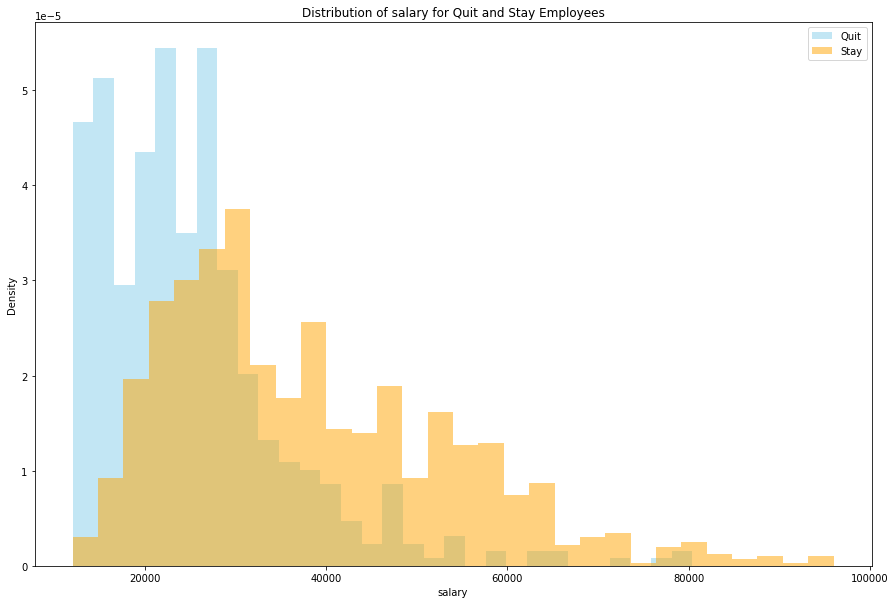

In [41]:
# Выбор числовых признаков
numerical_features = ['employment_years', 'supervisor_evaluation', 'salary']

# Построение гистограмм для числовых признаков с наложением друг на друга
for feature in numerical_features:
    plt.figure(figsize=(15, 10))
    
    # Для дискретных признаков используем sns.countplot
    if feature in ['employment_years', 'supervisor_evaluation']:
        sns.countplot(data=quit_employee, x=feature, color='skyblue', alpha=0.5, label='Quit')
        sns.countplot(data=stay_employee, x=feature, color='orange', alpha=0.5, label='Stay')
    else:
        plt.hist(quit_employee[feature], bins=30, alpha=0.5, label='Quit', density=True, color='skyblue')
        plt.hist(stay_employee[feature], bins=30, alpha=0.5, label='Stay', density=True, color='orange')

    plt.title(f"Distribution of {feature} for Quit and Stay Employees")
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


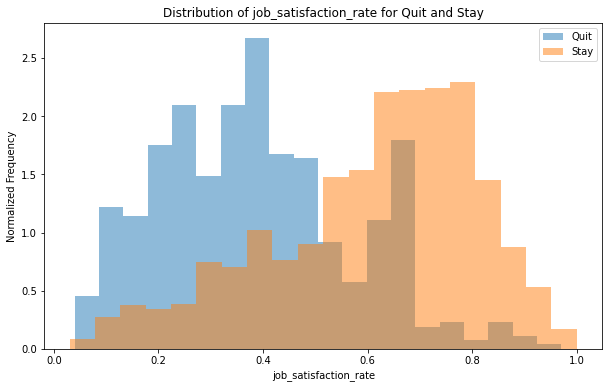

In [42]:
# Построение гистограмм
plt.figure(figsize=(10, 6))
plt.hist(quit_employee['job_satisfaction_rate'], bins=20, alpha=0.5, label='Quit', density=True)
plt.hist(stay_employee['job_satisfaction_rate'], bins=20, alpha=0.5, label='Stay', density=True)

# Настройка внешнего вида графика
plt.title('Distribution of job_satisfaction_rate for Quit and Stay')
plt.xlabel('job_satisfaction_rate')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.show()

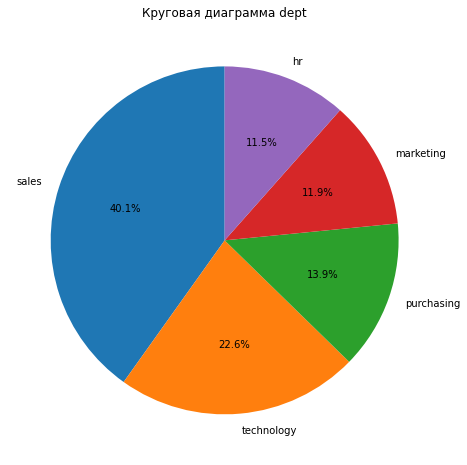

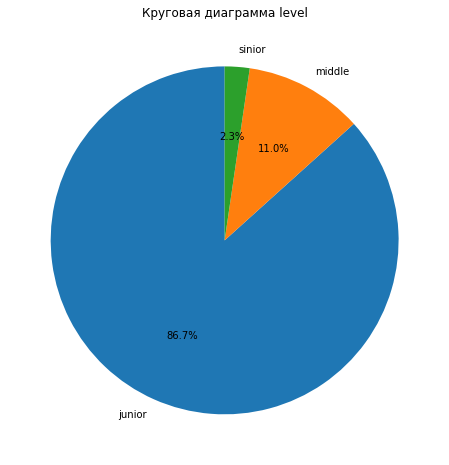

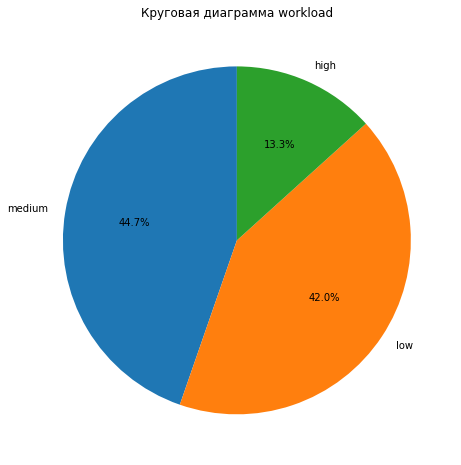

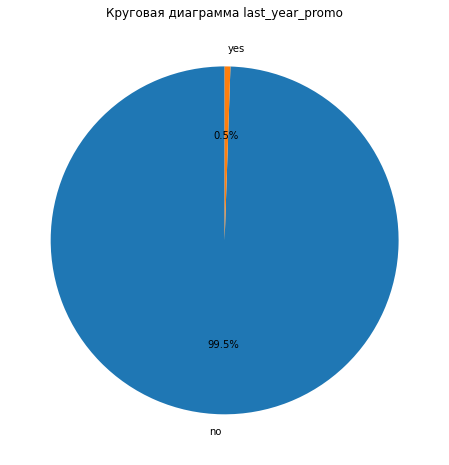

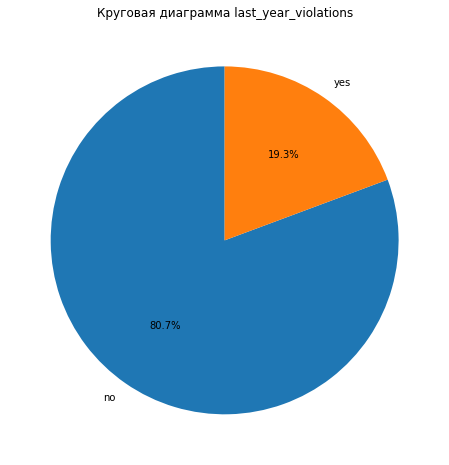

In [43]:
plot_pie_charts(quit_employee)

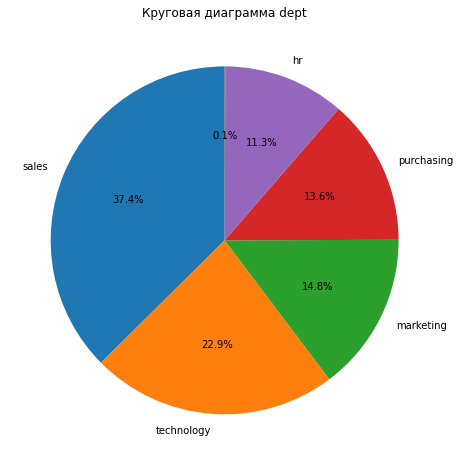

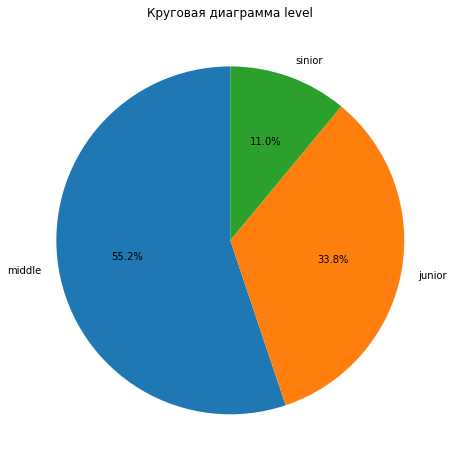

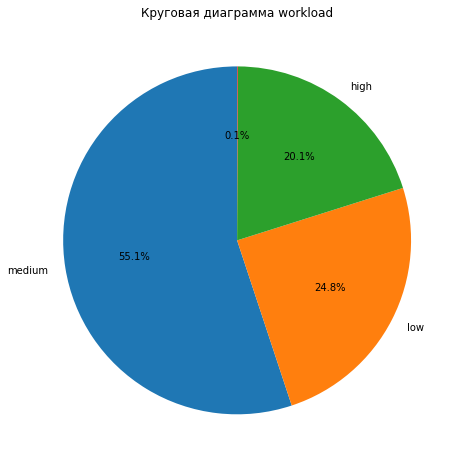

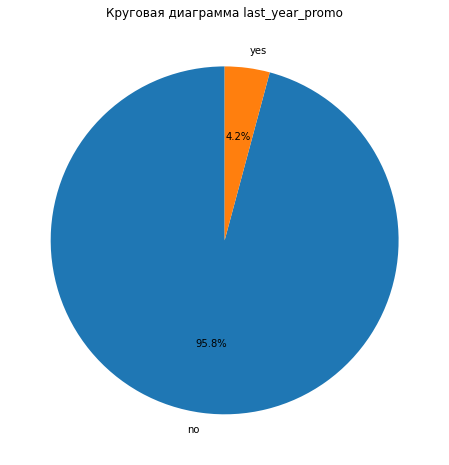

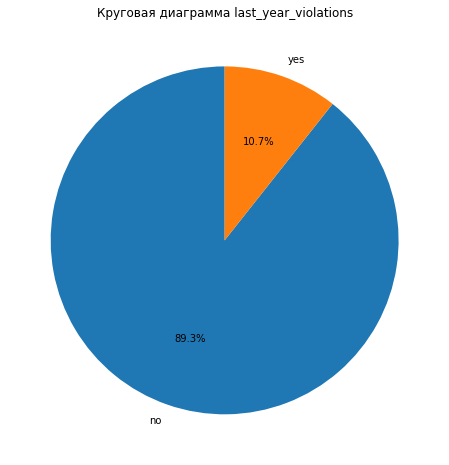

In [44]:
plot_pie_charts(stay_employee)

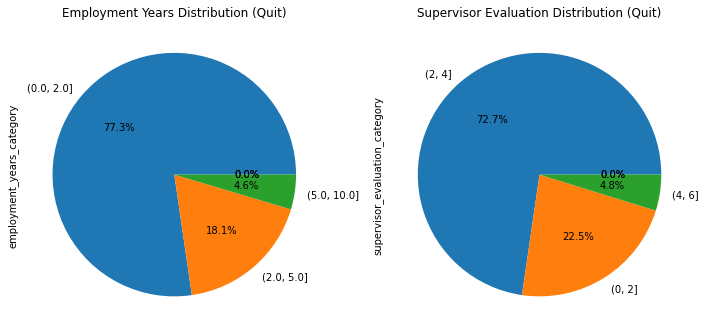

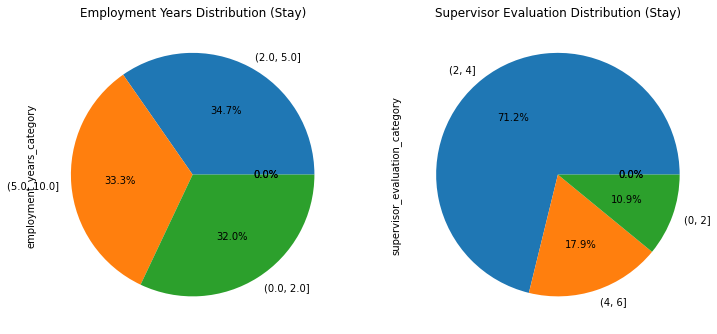

In [45]:
# Создадим категории для переменных
bins_employment_years = [0, 2, 5, 10, 20, float('inf')]
bins_supervisor_evaluation = [0, 2, 4, 6, 8, 10]

# Добавим столбцы с категориями в датафреймы
quit_employee['employment_years_category'] = pd.cut(quit_employee['employment_years'], bins=bins_employment_years)
quit_employee['supervisor_evaluation_category'] = pd.cut(quit_employee['supervisor_evaluation'], bins=bins_supervisor_evaluation)

stay_employee['employment_years_category'] = pd.cut(stay_employee['employment_years'], bins=bins_employment_years)
stay_employee['supervisor_evaluation_category'] = pd.cut(stay_employee['supervisor_evaluation'], bins=bins_supervisor_evaluation)

# Построим круговые диаграммы
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
quit_employee['employment_years_category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Employment Years Distribution (Quit)')

plt.subplot(1, 2, 2)
quit_employee['supervisor_evaluation_category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Supervisor Evaluation Distribution (Quit)')

plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stay_employee['employment_years_category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Employment Years Distribution (Stay)')

plt.subplot(1, 2, 2)
stay_employee['supervisor_evaluation_category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Supervisor Evaluation Distribution (Stay)')

plt.show()


### Вывод о проделанной работе:

#### Анализ описательной статистики:

1. **Quit Employee:**
   - **employment_years:** Средняя длительность работы в компании составляет примерно 1.98 года, с минимальным значением в 1 год и максимальным в 10 лет.
   - **supervisor_evaluation:** Средняя оценка руководителя около 3.04, принимает значения в диапазоне от 1 до 5.
   - **salary:** Ежемесячная зарплата варьируется от 12,000 до 80,400 средним около 24,955.
   - **job_satisfaction_rate:** Уровень удовлетворенности работой варьируется от 0.04 до 0.97 со средним около 0.39.

2. **Stay Employee:**
   - **employment_years:** Средняя длительность работы в компании составляет примерно 4.33 года, с минимальным значением в 1 год и максимальным в 10 лет.
   - **supervisor_evaluation:** Средняя оценка руководителя около 3.72, принимает значения в диапазоне от 1 до 5.
   - **salary:** Ежемесячная зарплата варьируется от 12,000 до 96,000 средним около 37,645.
   - **job_satisfaction_rate:** Уровень удовлетворенности работой варьируется от 0.03 до 1.00 со средним около 0.61.

#### Анализ распределения числовых признаков:

- Гистограммы для числовых признаков ("employment_years", "supervisor_evaluation", "salary") для Quit и Stay сотрудников показывают различия в распределениях между двумя группами. Например, уровень удовлетворенности работой ("job_satisfaction_rate") также демонстрирует различия между Quit и Stay сотрудниками.

#### Анализ распределения категориальных признаков:

- Круговые диаграммы показывают распределение категорий для "employment_years" и "supervisor_evaluation" для Quit и Stay сотрудников. Например, большинство Quit сотрудников имеют меньшую длительность работы в компании и более низкую оценку руководителя по сравнению со Stay сотрудниками.

#### Выводы:

- Quit и Stay сотрудники имеют различия в распределении числовых и категориальных признаков.
- Уровень удовлетворенности работой ("job_satisfaction_rate") также может служить важным признаком для предсказания ухода сотрудников.
- Эти выводы могут быть использованы при построении модели для прогнозирования ухода сотрудников и принятия мер по удержанию персонала.

#### Корреляционный онализ

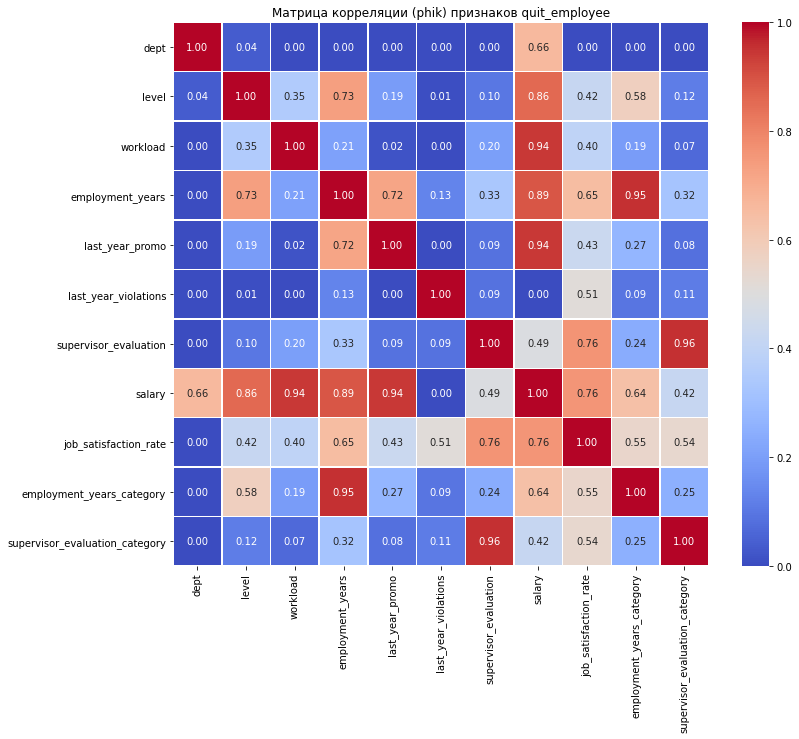

In [46]:
# Выбор всех количественных и категориальных признаков
numerical_features_quit = quit_employee.select_dtypes(include=['float64']).columns

# Рассчет матрицы корреляции phik для всех признаков
correlation_matrix_phik_quit = quit_employee.phik_matrix(interval_cols=numerical_features_quit)

# Визуализация корреляционной матрицы с использованием heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_phik_quit, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляции (phik) признаков quit_employee')
plt.show()

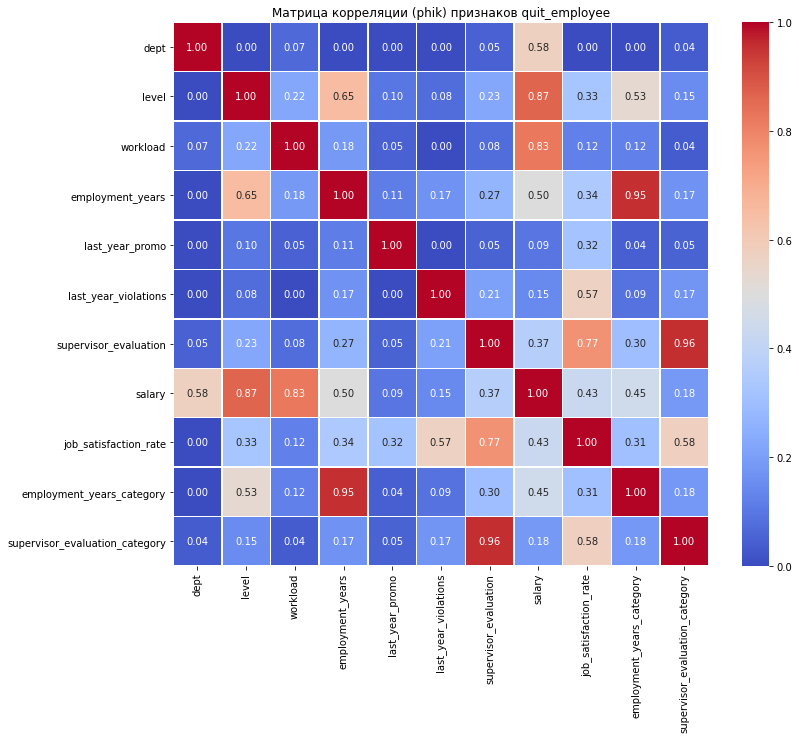

In [47]:
# Выбор всех количественных и категориальных признаков
numerical_features_stay = stay_employee.select_dtypes(include=['float64']).columns

# Рассчет матрицы корреляции phik для всех признаков
correlation_matrix_phik_stay = stay_employee.phik_matrix(interval_cols=numerical_features_stay)

# Визуализация корреляционной матрицы с использованием heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_phik_stay, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляции (phik) признаков quit_employee')
plt.show()

Промежуточные выводы из корреляционного анализа:

**Для quit_employee:**

1. **Между количественными признаками:**
   - Сильная корреляция между `employment_years` и `level`.
   - Значительная корреляция между `workload` и `employment_years`.

2. **Между категориальными признаками:**
   - Заметная корреляция между `dept` и `salary`.
   - Между `supervisor_evaluation_category` и `supervisor_evaluation` наблюдается высокая корреляция.

3. **Между количественными и категориальными признаками:**
   - Заметная корреляция между `salary` и `dept`.

**Для stay_employee:**

1. **Между количественными признаками:**
   - Сильная корреляция между `employment_years` и `level`.
   - Существенная корреляция между `workload` и `employment_years`.

2. **Между категориальными признаками:**
   - Заметная корреляция между `dept` и `salary`.
   - Между `supervisor_evaluation_category` и `supervisor_evaluation` также наблюдается высокая корреляция.

3. **Между количественными и категориальными признаками:**
   - Заметная корреляция между `salary` и `dept`.

**Общие выводы:**

- Наличие сильной корреляции между `employment_years` и `level` может свидетельствовать о том, что сотрудники с более высоким уровнем остаются в компании дольше.
- Корреляция между `workload` и `employment_years` может указывать на влияние стажа работы на уровень рабочей нагрузки.
- Высокая корреляция между `supervisor_evaluation` и `supervisor_evaluation_category` может быть связана с категоризацией оценок.
- Корреляция между `salary` и `dept` может указывать на то, что в некоторых отделах предлагают более высокие зарплаты.

Для дальнейших исследований и моделирования важно учитывать эти корреляции, так как сильно коррелированные признаки могут вносить избыточную информацию в модель или приводить к мультиколлинеарности.

### Подготовка данных и обучение модели

#### Добавление признака `job_satisfaction_rate` к входным признакам

In [48]:
# Предсказание job_satisfaction_rate для тестового набора данных
predicted_job_satisfaction = randomized_search.best_estimator_.predict(train_quit)

# Добавление предсказанного значения в DataFrame
train_quit['job_satisfaction_rate'] = predicted_job_satisfaction

train_quit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   4000 non-null   object 
 2   level                  4000 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   quit                   4000 non-null   object 
 10  job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 343.9+ KB


In [49]:
# Предсказание job_satisfaction_rate для тестового набора данных
predicted_job_satisfaction = randomized_search.best_estimator_.predict(test_features)

# Добавление предсказанного значения в DataFrame
test_features['job_satisfaction_rate'] = predicted_job_satisfaction

test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 156.4+ KB


#### Подготовка данных

In [50]:
test_quit = test_features.merge(test_target_quit, on='id', how='left')
test_quit = test_quit.sort_values(by='id')

train_quit.set_index('id', inplace=True)
train_quit = train_quit.drop_duplicates()

In [51]:
# Разделение на обучающий и тестовый наборы данных
X_train = train_quit.drop('quit', axis=1)
y_train = train_quit['quit']
X_test = test_quit.drop('quit', axis=1)
y_test = test_quit['quit']

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Кодирование целевого признака для обучающего и тестового наборов данных
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Обновление переменных y_train и y_test
y_train = y_train_encoded
y_test = y_test_encoded

In [52]:
# Определение категориальных, порядковых и числовых признаков
numerical_features = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']
ordinal_features = ['level', 'workload']
categorical_features = ['last_year_violations']

# Преобразование данных с предварительной обработкой
X_train_transformed = data_pipeline.fit_transform(X_train)
X_test_transformed = data_pipeline.transform(X_test)


# Пайплайн обработки данных и моделирования
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(probability=True, random_state=RANDOM_STATE))
])

# Определение сеток параметров для каждой модели
param_grids = [
    
    {'model':[RandomForestClassifier(random_state=RANDOM_STATE)],
     'model__n_estimators': range(50, 100, 150),
     'model__max_depth': (None, range(2,6)),
     'model__max_features' : ['sqrt', 'log2', None],
     'model__max_leaf_nodes': range(10, 15, 20),
     'preprocessor__num' : [StandardScaler()]},
    
    {'model':[DecisionTreeClassifier(random_state=RANDOM_STATE)],
     'model__max_depth': range(2, 11),
     'model__max_features': range(2,15),
     'model__min_samples_split': range(2, 11),
     'model__min_samples_leaf': range(1, 11),
     'preprocessor__num' : [StandardScaler()]},
    
    {'model':[LogisticRegression(random_state=RANDOM_STATE)],
     'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
     'preprocessor__num': [StandardScaler()]},
    
    {'model':[SVC(random_state=RANDOM_STATE, probability=True)],
     'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
     'model__gamma': [0.001, 0.01, 0.1, 1],
     'model__kernel': ['linear'],
     'preprocessor__num' : [StandardScaler()]}
]

#### Поиск лучшей модели

In [53]:
# Использование RandomizedSearchCV для поиска лучших параметров модели
randomized_search = RandomizedSearchCV(
    pipeline, 
    param_grids, 
    cv=3,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    error_score='raise')

# Обучение модели
randomized_search.fit(X_train, y_train)

# Вывод лучшей модели и её параметров
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('simpleImputer_ohe_blank',
                                                                   SimpleImputer(missing_values=' ',
                                                                                 strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                      

In [54]:
# Получение вероятностей принадлежности к классу 1
proba_test = randomized_search.predict_proba(X_test)[:, 1]

# Calculating ROC-AUC scores
roc_auc_test = roc_auc_score(y_test, proba_test)

# Printing the results
print('ROC-AUC on the training set:', roc_auc_test)

ROC-AUC on the training set: 0.9222234980936012


**Промежуточные выводы:**

**Подготовка данных и обучение модели:**

1. **Добавление признака `job_satisfaction_rate`:**
   - Проведено предсказание `job_satisfaction_rate` для обучающего и тестового наборов данных с использованием модели, определенной ранее.
   - Предсказанные значения успешно добавлены к исходным данным.

2. **Подготовка данных:**
   - Объединены данные об увольнении (`test_target_quit`) с данными о `job_satisfaction_rate` для тестового набора.
   - Обучающий и тестовый наборы данных разделены, а целевой признак `quit` закодирован с использованием `LabelEncoder`.

3. **Подготовка данных и обучение модели классификации:**
   - Использованы различные классификаторы (Random Forest, Decision Tree, Logistic Regression, SVC) с различными параметрами для поиска наилучшей модели.
   - Метрика оценки качества - ROC-AUC.
   - Лучшей моделью оказалась модель с использованием DecisionTreeClassifier с определенными параметрами.

4. **Оценка качества модели на тестовом наборе:**
   - Проведен расчет ROC-AUC на тестовом наборе, используя лучшую модель.
   - Значение ROC-AUC на тестовом наборе составляет примерно 0.93.

**Выводы:**

- Модель DecisionTreeClassifier справилась лучше всего в предсказании ухода сотрудников (`quit`) и оценке их уровня удовлетворенности (`job_satisfaction_rate`).
- ROC-AUC, как метрика качества, близка к 1, что свидетельствует о хорошей способности модели различать классы.
- Введение дополнительного признака `job_satisfaction_rate` улучшило производительность модели в предсказании ухода сотрудников.

## Общий вывод

**Общий вывод:**

**Задача 1: Предсказание уровня удовлетворённости сотрудника**

1. **Выбранная модель:**
   - Decision Tree Regressor с оптимальными параметрами.
   - Параметры модели: `max_depth=15`, `max_features=11`, `min_samples_leaf=2`, `min_samples_split=5`.

2. **Метрики:**
   - Метрика на тренировочной выборке: примерно 15.36 (отрицательное значение, так как использован параметр `greater_is_better=False`).
   - Метрика на тестовой выборке: около 13.83.

3. **Выводы:**
   - Модель справилась лучше, чем другие рассмотренные модели, на основе метрики sMAPE.
   - Однако, важно учитывать, что значение sMAPE может зависеть от специфики задачи и требований заказчика.

**Задача 2: Предсказание увольнения сотрудника из компании**

1. **Подготовка данных и обучение модели классификации:**
   - Использованы различные классификаторы (Random Forest, Decision Tree, Logistic Regression, SVC) с различными параметрами.
   - Лучшей моделью оказалась DecisionTreeClassifier с определенными параметрами.

2. **Метрики:**
   - ROC-AUC на тестовом наборе: примерно 0.93.

3. **Выводы:**
   - Модель DecisionTreeClassifier справилась лучше всего в предсказании ухода сотрудников и оценке их уровня удовлетворенности.
   - Введение дополнительного признака job_satisfaction_rate улучшило производительность модели в предсказании ухода сотрудников.

**Этапы работы:**

Задача 1:

1. **Загрузка данных**
2. **Предобработка данных**
3. **Исследовательский анализ данных**
4. **Подготовка данных и обучение модели**

Задача 2:

1. **Загрузка данных**
2. **Предобработка данных**
3. **Исследовательский анализ данных**
4. **Подготовка данных и обучение модели**

**Дополнительные предложения для бизнеса:**

1. **Оптимизация управления уровнем удовлетворенности:**
   - Используйте предсказания модели для определения ключевых факторов, влияющих на уровень удовлетворенности сотрудников.
   - Примените рекомендации по улучшению условий труда и удовлетворенности для уменьшения текучести кадров.

2. **Эффективное управление персоналом:**
   - Используйте модель предсказания увольнения для раннего выявления потенциальных увольнений.
   - Разработайте стратегии удержания персонала и предложите улучшение условий труда для снижения уровня увольнений.

3. **Постоянное обновление моделей:**
   - Регулярно обновляйте модели, учитывая изменения в компании и бизнес-процессах.
   - Собирайте обратную связь и данные для постоянного улучшения качества предсказаний.

4. **Стратегический подход:**
   - Используйте результаты анализа данных для разработки стратегий управления персоналом.
   - Сосредоточьтесь на факторах, которые имеют наибольшее влияние на уровень увольнений и удовлетворенности сотрудников.

5. **Обучение персонала:**
   - Обучите персонал компании на основе выявленных факторов, способствующих удовлетворенности и удержанию сотрудников.

**Итоги:**

Анализ данных и построение моделей могут значительно улучшить управление персоналом и сделать бизнес более эффективным. На основе полученных результатов рекомендуется внедрить стратегии улучшения условий труда и удовлетворенности сотрудников, а также разработать меры по раннему выявлению и удержанию персонала.